Ok every time I make one of these the format sucks so this time I'll try (extra hard) to make it as streamlined as possible!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
#from detector 1:
d1_U = np.genfromtxt('uranium_test_2019-02-19_D3S.csv', delimiter= ",").T
d1_Th = np.genfromtxt('thorium_test_2019-02-19_D3S.csv', delimiter= ",").T
#from detector 2:
d2_U = np.genfromtxt('Uranium_102566_2019-03-28_D3S.csv', delimiter= ",").T
d2_Th = np.genfromtxt('Thorium_102566_2019-03-28_D3S.csv', delimiter= ",").T

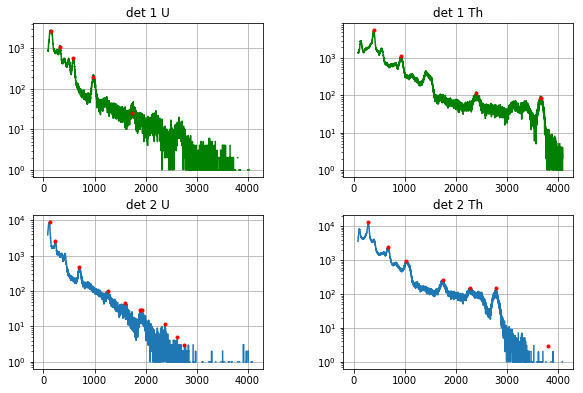

In [4]:
plt.subplot(221)
sd1U = np.sum(d1_U, axis=1)
plt.plot(sd1U, 'g')
manual_u = [1741, 980, 583, 324, 139]
plt.plot(manual_u, sd1U[manual_u], 'r.')
plt.yscale('log')
plt.title('det 1 U')
plt.grid(True)

plt.subplot(222)
sd1Th = np.sum(d1_Th, axis=1)
plt.plot(sd1Th[:-1], 'g')
manual_th = [390, 925, 2406, 3666]
plt.plot(manual_th, sd1Th[manual_th], 'r.')
plt.yscale('log')
plt.title('det 1 Th')
plt.grid(True)

plt.subplot(223)
sd2U = np.sum(d2_U, axis=1)
plt.plot(sd2U)
pfc_u = [118, 232, 704, 1260, 1604, 1888, 1913, 1935, 2380, 2624, 2762] # from peakfinder.py just for fun
plt.plot(pfc_u, sd2U[pfc_u], 'r.')
plt.yscale('log')
plt.title('det 2 U')
plt.grid(True)

plt.subplot(224)
sd2Th = np.sum(d2_Th, axis=1)
plt.plot(sd2Th)
pfc_th = [282, 672, 1019, 1745, 2280, 2786, 3817]
plt.plot(pfc_th, sd2Th[pfc_th], 'r.')
plt.yscale('log')
plt.title('det 2 Th')
plt.grid(True)

plt.subplots_adjust(top=1, bottom=-0.2, left=0, right=1.25, hspace=0.25, wspace=0.35)
plt.show()

In [5]:
def fitFunc(x, a, m, s, c):
    return a * np.exp(-(x - m)**2 / (2 * s**2)) + c
def linBgFitFunc(x, a, m, s, c, b):
    return a * np.exp(-(x - m)**2 / (2 * s**2)) + c + b * x
def find(xSlice, xshift, trymax=20, trymu=200, trysig=100, trybg=5):
    xmu = np.mean(xSlice)
    xsig = np.std(xSlice)
    xxdata = range(len(xSlice))
    trydata = fitFunc(xSlice, np.max(xSlice), xmu, xsig, np.max(xSlice) + 50)
    p0 = [trymax,trymu,trysig,trybg]
    xpopt, xpcov = curve_fit(fitFunc, xxdata, xSlice, p0)
    print(xpopt)
    xchannel = xshift + int(xpopt[1])
    return xchannel
    #plt.show()
def linBgFind(xSlice, xshift, trymax=20, trymu=200, trysig=100, trybg=5, trylin=-20):
    xmu = np.mean(xSlice)
    xsig = np.std(xSlice)
    xxdata = range(len(xSlice))
    p0 = [trymax,trymu,trysig,trybg, trylin]
    xpopt, xpcov = curve_fit(linBgFitFunc, xxdata, xSlice, p0)
    print(xpopt)
    xchannel = xshift + int(xpopt[1])
    return xchannel
def showFindFit(xSlice, xshift, trymax=20, trymu=200, trysig=100, trybg=5, lin=1):
    xmu = np.mean(xSlice)
    xsig = np.std(xSlice)
    xxdata = range(len(xSlice))
    #trydata = linBgFitFunc(1, np.max(xSlice), xmu, xsig, np.max(xSlice) + 50, lin)
    p0 = [trymax,trymu,trysig,trybg, lin]
    xpopt, xpcov = curve_fit(linBgFitFunc, xxdata, xSlice, p0)
    print(xpopt)
    xchannel = xshift + int(xpopt[1])
    return linBgFitFunc(xxdata, *xpopt)

This part is for finding one of the uranium peaks that the peakFinder didnt highlight.

[ 412.14947471   43.78304231  -22.8951626   129.1928381 ]
583


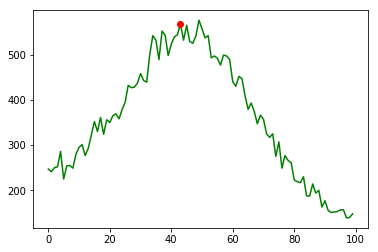

In [17]:
Bi5_shift = 540
Bi5_range = 100
Bi5_slice = sd1U[Bi5_shift:Bi5_shift+Bi5_range]
plt.plot(Bi5_slice , 'g')
Bi5_find = find(Bi5_slice, Bi5_shift)
print(Bi5_find)
plt.plot(Bi5_find-Bi5_shift, Bi5_slice[Bi5_find-Bi5_shift], 'ro')

plt.show()

[ 786.42505559   19.18766335   20.79960615  317.30306821]
419


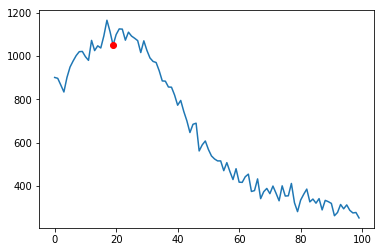

In [7]:
Bi5_shift = 400
Bi5_range = 100
Bi5_slice = sd2U[Bi5_shift:Bi5_shift+Bi5_range]
plt.plot(Bi5_slice)
Bi5_find = find(Bi5_slice, Bi5_shift)
print(Bi5_find)
plt.plot(Bi5_find-Bi5_shift, Bi5_slice[Bi5_find-Bi5_shift], 'ro')

plt.show()
# 419 is the channel in d2 that cooresponds to ch583 in d1

In [15]:
manual_u #=[1741, 980, 583, 324, 139]
pfc_u = [1260, 704, 419, 232, 118] #=[118, 232, 704, 1260, 1604, 1888, 1913, 1935, 2380, 2624, 2762]
en_u = [1120.3, 609.3, 352, 185.7, 92.6]

manual_th = [390, 925, 3666]#= [390, 925, 2406, 3666]
pfc_th = [282, 672, 2786]#=[282, 672, 1019, 1745, 2280, 2786, 3817]
en_th = [238.6, 583.1, 2614.7]

d1 = manual_u + manual_th
d2 = pfc_u + pfc_th
en = en_u + en_th

In [12]:
def polyfit(x, b, m, r):
    return r * x*x + m*x + b

[  4.97812684e+00   5.80899642e-01   3.56962797e-05]


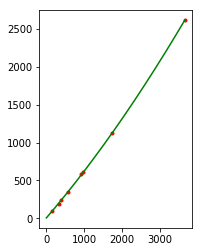

[ -1.10849331e+01   8.61410317e-01   2.91042468e-05]


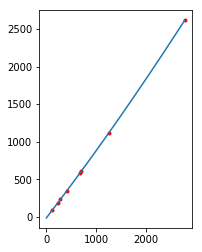

In [18]:
plt.subplot(121)
plt.plot(d1, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, d1, en, p0)
print(xpopt)
plt.plot(polyfit(range(max(d1)), *xpopt), 'g')
plt.show()

plt.subplot(122)
plt.plot(d2, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, d2, en, p0)
print(xpopt)
plt.plot(polyfit(range(max(d2)), *xpopt))
plt.show()